In [3]:
import importlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from tqdm.notebook import tqdm
import json
import sys
windows_os = False

if windows_os:
    base_path = "C:/Users"
else:
    base_path = r"/media/gianlucanogara/Windows/Users"

path_utils = base_path + "/gianluca.nogara/Desktop/Repo/Vaccines_Discussion_Italy/tweet_utils"
sys.path.append(path_utils)
import utils
base = base_path + "/gianluca.nogara/Desktop/Repo/Vaccines_Discussion_Italy/Italian"
path_files = base_path + '/gianluca.nogara/switchdrive/Project VaccinItaly'

ImportError: Unable to import required dependencies:
numpy: No module named 'numpy'

In [2]:
# names = glob(path_files + "/Botometer/res*.csv")
names = glob("/home/gianlucanogara/Scrivania/botometer/*.csv")

In [3]:
perspective = pd.read_csv(base + "/files/scores/perspective.csv", lineterminator="\n", low_memory=False,
                          encoding="utf-8")
tweets = pd.read_csv(base + "/files/tweets/tweets.csv", lineterminator="\n", low_memory=False,
                          encoding="utf-8")

In [4]:
perspective = perspective.merge(tweets, on="id", how="left")
perspective = perspective[["user_screen_name", "SEVERE_TOXICITY", "LIKELY_TO_REJECT", "INSULT", "PROFANITY", "THREAT"]]
perspective = perspective.groupby("user_screen_name").median()
perspective.reset_index(inplace=True)
perspective

,user_screen_name,SEVERE_TOXICITY,LIKELY_TO_REJECT,INSULT,PROFANITY,THREAT
0,00000o0OOOO00,0.157186,0.122222,0.157588,0.120821,0.134195
1,000Rizzo,0.040612,0.192553,0.087039,0.167834,0.140925
2,000oro000,0.459639,0.265003,0.568245,0.337320,0.403958
3,000qwerty777,0.240654,0.023922,0.379061,0.095024,0.065196
4,000salvatore000,0.298438,0.490315,0.354081,0.120553,0.099742
...,...,...,...,...,...,...
293913,zzostru,0.087044,0.247786,0.122222,0.267408,0.196759
293914,zzpietro,0.269455,0.378775,0.038871,0.054437,0.107349
293915,zzurro65,0.088489,0.042423,0.123598,0.122222,0.490315
293916,zzxang86,0.441785,0.055554,0.076164,0.070444,0.085049


In [5]:
credibility = pd.read_csv(base + "/files/domains/result_cred_score_thresh_10_low_domains.csv", lineterminator="\n", low_memory=False,
                          encoding="utf-8")
credibility = credibility[["user_screen_name", "credibility_score"]]
credibility = credibility.merge(perspective, on="user_screen_name", how="right")
credibility

,user_screen_name,credibility_score,SEVERE_TOXICITY,LIKELY_TO_REJECT,INSULT,PROFANITY,THREAT
0,00000o0OOOO00,NaN,0.157186,0.122222,0.157588,0.120821,0.134195
1,000Rizzo,NaN,0.040612,0.192553,0.087039,0.167834,0.140925
2,000oro000,NaN,0.459639,0.265003,0.568245,0.337320,0.403958
3,000qwerty777,NaN,0.240654,0.023922,0.379061,0.095024,0.065196
4,000salvatore000,NaN,0.298438,0.490315,0.354081,0.120553,0.099742
...,...,...,...,...,...,...,...
293913,zzostru,NaN,0.087044,0.247786,0.122222,0.267408,0.196759
293914,zzpietro,NaN,0.269455,0.378775,0.038871,0.054437,0.107349
293915,zzurro65,NaN,0.088489,0.042423,0.123598,0.122222,0.490315
293916,zzxang86,NaN,0.441785,0.055554,0.076164,0.070444,0.085049


In [6]:
df = pd.DataFrame()
for name in names:
    # print(name)
    temp = pd.read_csv(name, lineterminator="\n", low_memory=False, encoding="utf-8")
    df = pd.concat([df, temp], axis=0)
df.drop_duplicates(subset=["name"], inplace=True)
df.reset_index(drop=True, inplace=True)
df = df[df["score"].notna()]
df["score"] = [value.replace("\'", "\"") for value in df["score"]]
df

,name,score
0,gue_sonia,"{""cap"": {""english"": 0.797075908158591, ""univer..."
1,anna_volante,"{""cap"": {""english"": 0.7998362042473794, ""unive..."
2,Fabme0801,"{""cap"": {""english"": 0.8100783815308749, ""unive..."
3,Monica74930598,"{""cap"": {""english"": 0.7874002196908744, ""unive..."
4,IngaldoO,"{""cap"": {""english"": 0.7826357858330618, ""unive..."
...,...,...
233975,PLTerreCastelli,"{""cap"": {""english"": 0.7967206940193189, ""unive..."
233976,BimbiMeb,"{""cap"": {""english"": 0.7826357858330618, ""unive..."
233977,UiltecTAA,"{""cap"": {""english"": 0.816204310368583, ""univer..."
233978,OttaviMatteo,"{""cap"": {""english"": 0.7611878625273879, ""unive..."


In [7]:
list_of_names = ["astroturf", "fake_follower", "financial", "other", "overall", "self_declared", "spammer"]

In [8]:
def calculate_cap_scores(score):
    if (score is None) or ('"cap":' not in score):
        return np.nan
    else:
        data = json.loads(score)
        cap = data["cap"]
        eng_score = cap["universal"]
        score = eng_score
    return score

In [9]:
def type_of_bot(df):
    list_of_list = [[], [], [], [], [], [], []]
    for i in df["score"]:
        if (i is None) or ('"cap":' not in i):
            for v in list_of_list:
                v.append(np.nan)
        else:
            i = json.loads(i)
            for v in range(len(i["raw_scores"]["universal"])):
                list_of_list[v].append(i["raw_scores"]["universal"][list_of_names[v]])
    astroturf = list_of_list[0]
    fake_follower = list_of_list[1]
    financial = list_of_list[2]
    other = list_of_list[3]
    overall = list_of_list[4]
    self_declared = list_of_list[5]
    spammer = list_of_list[6]
    return astroturf, fake_follower, financial, other, overall, self_declared, spammer

In [10]:
df["cap"] = [calculate_cap_scores(i) for i in list(df["score"])]

In [11]:
lst = type_of_bot(df)

In [12]:
df[list_of_names[0]] = lst[0]
df[list_of_names[1]] = lst[1]
df[list_of_names[2]] = lst[2]
df[list_of_names[3]] = lst[3]
df[list_of_names[4]] = lst[4]
df[list_of_names[5]] = lst[5]
df[list_of_names[6]] = lst[6]


In [13]:
df_users = pd.read_csv(base + "/files/tweets/tweets.csv", lineterminator="\n", low_memory=False, encoding="utf-8",
                       usecols=["user_screen_name", "user_verified"])
df_users.drop_duplicates(subset=["user_screen_name"], inplace=True, keep="last")
df_users.rename(columns={"user_screen_name" : "name"}, inplace=True)
df_users

,name,user_verified
2,MarisaMinervini,False
10,MaliziaRosy,False
22,Monica13293502,False
26,fondazionelkt,False
43,AnnaTulliach,False
...,...,...
4053196,CiaoGrosso,False
4053197,Rosskitty77,False
4053198,GuidoIafrate,False
4053199,lucabattanta,False


In [14]:
df = df.merge(df_users, on="name", how="left")
df = df[df["score"].str.contains("cap")]
df = df[df["score"].notna()]
df

,name,score,cap,astroturf,fake_follower,financial,other,overall,self_declared,spammer,user_verified
0,gue_sonia,"{""cap"": {""english"": 0.797075908158591, ""univer...",0.782827,0.33,0.25,0.17,0.42,0.29,0.00,0.01,False
1,anna_volante,"{""cap"": {""english"": 0.7998362042473794, ""unive...",0.708983,0.55,0.22,0.02,0.48,0.20,0.22,0.01,False
2,Fabme0801,"{""cap"": {""english"": 0.8100783815308749, ""unive...",0.805402,0.55,0.15,0.07,0.48,0.55,0.01,0.01,False
3,Monica74930598,"{""cap"": {""english"": 0.7874002196908744, ""unive...",0.800688,0.28,0.22,0.05,0.51,0.37,0.09,0.03,False
4,IngaldoO,"{""cap"": {""english"": 0.7826357858330618, ""unive...",0.733500,0.26,0.11,0.01,0.18,0.22,0.00,0.01,False
...,...,...,...,...,...,...,...,...,...,...,...
233975,PLTerreCastelli,"{""cap"": {""english"": 0.7967206940193189, ""unive...",0.792437,0.02,0.25,0.00,0.48,0.32,0.29,0.15,False
233976,BimbiMeb,"{""cap"": {""english"": 0.7826357858330618, ""unive...",0.522240,0.45,0.11,0.00,0.22,0.11,0.00,0.00,False
233977,UiltecTAA,"{""cap"": {""english"": 0.816204310368583, ""univer...",0.842103,0.07,0.37,0.17,0.86,0.86,0.03,0.16,False
233978,OttaviMatteo,"{""cap"": {""english"": 0.7611878625273879, ""unive...",0.522240,0.04,0.14,0.01,0.19,0.11,0.00,0.03,False


In [15]:
box = (list(df["cap"]))

In [16]:
df["score"][1]

'{"cap": {"english": 0.7998362042473794, "universal": 0.7089830786080018}, "display_scores": {"english": {"astroturf": 2.8, "fake_follower": 1.6, "financial": 0.0, "other": 3.6, "overall": 3.6, "self_declared": 1.8, "spammer": 0.1}, "universal": {"astroturf": 2.8, "fake_follower": 1.1, "financial": 0.1, "other": 2.4, "overall": 1.0, "self_declared": 1.1, "spammer": 0.0}}, "raw_scores": {"english": {"astroturf": 0.56, "fake_follower": 0.32, "financial": 0.01, "other": 0.73, "overall": 0.73, "self_declared": 0.36, "spammer": 0.02}, "universal": {"astroturf": 0.55, "fake_follower": 0.22, "financial": 0.02, "other": 0.48, "overall": 0.2, "self_declared": 0.22, "spammer": 0.01}}, "user": {"majority_lang": "it", "user_data": {"id_str": "1169859545864134656", "screen_name": "anna_volante"}}}'

[0.28846389695411967, 0.813043153461001]


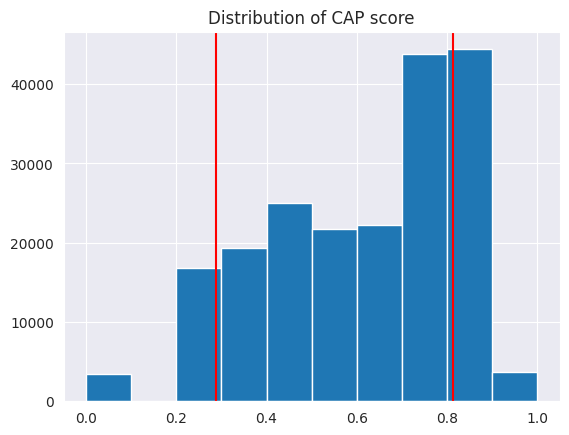

In [17]:
index = [10, 90]
# box = list(df["cap"])
perc_numpy = [np.nanpercentile(box, i, interpolation='nearest') for i in index]
print(perc_numpy)
threshold_human = perc_numpy[0]
threshold_bot = perc_numpy[1]
# # Plotting
plt.hist(box, 10)
for i in range(len(index)):
    plt.axvline(perc_numpy[i], color='r')
plt.title("Distribution of CAP score")
plt.show()

In [18]:
df_humans = df[df["cap"]<= threshold_human]
df_bots = df[df["cap"]>= threshold_bot]
print(df_bots["user_verified"].value_counts())
print(df_humans["user_verified"].value_counts())

False    20588
True        99
Name: user_verified, dtype: int64
False    20114
True        18
Name: user_verified, dtype: int64


# Bots and Humans interactions and activity

In [20]:
df_bots_active = tweets[tweets["user_screen_name"].isin(list(df_bots["name"]))]
print(len(df_bots_active))
df_bots_passive = tweets[(tweets["rt_user_screen_name"].isin(list(df_bots["name"])))]
print(len(df_bots_passive))
df_bots_no_verified = df_bots[df_bots["user_verified"]==False]
print("---------------------------------------")
df_bots_active_no_verified = tweets[tweets["user_screen_name"].isin(list(df_bots_no_verified["name"]))]
print(len(df_bots_active_no_verified))
df_bots_passive_no_verified = tweets[tweets["rt_user_screen_name"].isin(list(df_bots_no_verified["name"]))]
print(len(df_bots_passive_no_verified))

333072
163774
---------------------------------------
313655
88274


In [21]:
df_bots_active_no_verified["user_screen_name"].value_counts().sort_values(ascending=False)

infoitinterno      17259
infoitsalute       15853
infoiteconomia      6023
IacobellisT         4333
TommyBrain          4115
                   ...  
ereminrights           1
ilRebbo                1
mariangelad79          1
gaetano28645905        1
brunopepi2             1
Name: user_screen_name, Length: 20588, dtype: int64

In [50]:
df_bots_passive_no_verified["user_screen_name"].value_counts().sort_values(ascending=False)

TuttoQuaNews       412
IzzoEdo            395
MassimoRandolfi    391
MassimoChiaram7    330
generacomplotti    330
                  ... 
RobiRobipit          1
IlBabs               1
RosannaLaplaca       1
lunedialsole         1
Carolin59848397      1
Name: user_screen_name, Length: 30720, dtype: int64

In [22]:
df_humans_active = tweets[tweets["user_screen_name"].isin(list(df_humans["name"]))]
print(len(df_humans_active))
df_humans_passive = tweets[tweets["rt_user_screen_name"].isin(list(df_humans["name"]))]
print(len(df_humans_passive))

195441
32437


# Bots credibility and toxicity

0.16016191
0.16178047399999998


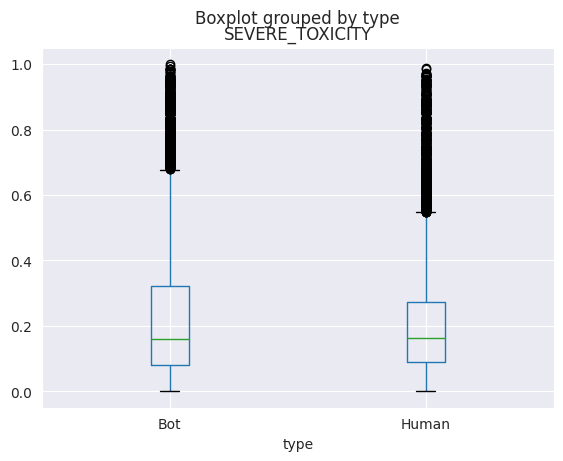

In [23]:
df_bots_cred = df_bots.merge(credibility, left_on="name", right_on="user_screen_name", how="left")
df_humans_cred = df_humans.merge(credibility, left_on="name", right_on="user_screen_name", how="left")
df_bots_cred["type"] = "Bot"
df_humans_cred["type"] = "Human"
df_tot = pd.concat([df_humans_cred, df_bots_cred], axis=0)
boxplot = df_tot.boxplot(column=['SEVERE_TOXICITY'], by="type")
print(np.nanmedian(df_bots_cred["SEVERE_TOXICITY"])) # anche togliendo i verificatgi la situazione non cambia, andrebbero toli tutti i newspaper
print(np.nanmedian(df_humans_cred["SEVERE_TOXICITY"]))

<AxesSubplot:title={'center':'credibility_score'}, xlabel='type'>

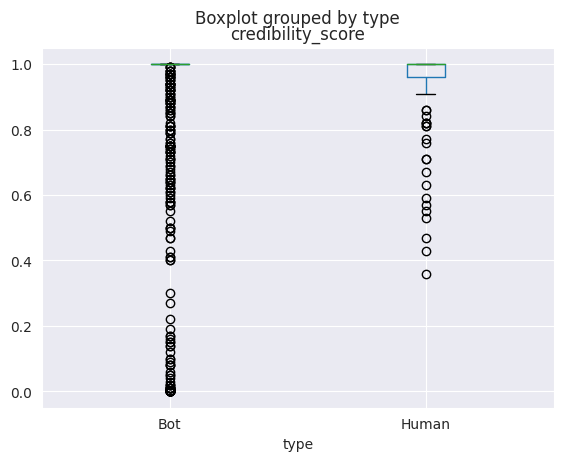

In [24]:
df_tot.boxplot(column=['credibility_score'], by="type")

In [25]:
trollscores = pd.read_csv('/media/gianlucanogara/Windows/Users/gianluca.nogara/Desktop/Repo/Vaccines_Discussion_Italy/Italian/files/scores/df_trollscore_botomter.csv',
                          lineterminator='\n', low_memory=False, encoding='utf-8')
df_tot = df_tot.merge(trollscores, on="name", how='left')
df_tot

,name,score,cap,astroturf,fake_follower,financial,other,overall,self_declared,spammer,user_verified,user_screen_name,credibility_score,SEVERE_TOXICITY,LIKELY_TO_REJECT,INSULT,PROFANITY,THREAT,type,trollscore
0,Eled_nil,"{""cap"": {""english"": 0.6915799517497913, ""unive...",0.288464,0.21,0.10,0.00,0.22,0.03,0.00,0.00,False,Eled_nil,NaN,0.131940,0.092779,0.116521,0.120821,0.102290,Human,0.000037
1,AndreaTerraneo1,"{""cap"": {""english"": 0.5539725719744064, ""unive...",0.233324,0.00,0.00,0.03,0.03,0.01,0.00,0.00,False,AndreaTerraneo1,NaN,0.108746,0.230364,0.358586,0.263505,0.119193,Human,NaN
2,MariCatell,"{""cap"": {""english"": 0.7546218700467833, ""unive...",0.260368,0.08,0.01,0.00,0.10,0.02,0.00,0.00,False,MariCatell,0.59,0.165623,0.122222,0.146402,0.147656,0.127205,Human,0.004895
3,aseret55,"{""cap"": {""english"": 0.621687023966582, ""univer...",0.260368,0.09,0.01,0.00,0.10,0.02,0.00,0.00,False,aseret55,NaN,0.269455,0.264286,0.240654,0.310696,0.263505,Human,NaN
4,goemonishik11,"{""cap"": {""english"": 0.621687023966582, ""univer...",0.000000,0.02,0.10,0.01,0.08,0.00,0.00,0.01,False,goemonishik11,NaN,0.442755,0.176424,0.242413,0.490438,0.260188,Human,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40814,magialesere,"{""cap"": {""english"": 0.923535423667034, ""univer...",0.853292,0.00,0.88,0.08,0.81,0.88,0.76,0.36,False,magialesere,NaN,0.331797,0.264286,0.650564,0.642381,0.490315,Bot,NaN
40815,GabrieleUrz1,"{""cap"": {""english"": 0.8036706514015852, ""unive...",0.813043,0.20,0.45,0.06,0.77,0.77,0.22,0.11,False,GabrieleUrz1,NaN,0.078595,0.109197,0.061144,0.050614,0.047432,Bot,NaN
40816,NoemiSalvatori,"{""cap"": {""english"": 0.8199148539199458, ""unive...",0.888526,0.20,0.51,0.34,0.93,0.93,0.45,0.15,False,NoemiSalvatori,NaN,0.446688,0.313008,0.350030,0.177630,0.263505,Bot,NaN
40817,ccorredorcely,"{""cap"": {""english"": 0.8339181685112829, ""unive...",0.825257,0.50,0.31,0.12,0.82,0.82,0.01,0.09,False,ccorredorcely,NaN,0.269455,0.135006,0.369569,0.122059,0.070607,Bot,NaN


<AxesSubplot:title={'center':'trollscore'}, xlabel='type'>

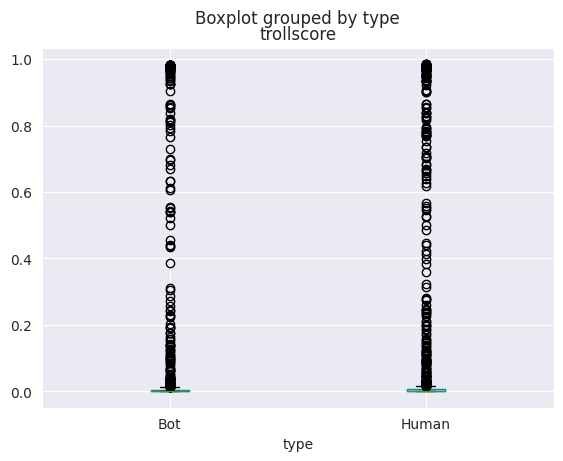

In [26]:
df_tot.boxplot(column=['trollscore'], by="type")

# Commuinities

In [29]:
louvain = pd.read_csv(base_path + "/gianluca.nogara/Desktop/Repo/Vaccines_Discussion_Italy/Italian/files/networks/louvain.csv")
df_tot = df_tot.merge(louvain, on="name", how="left")

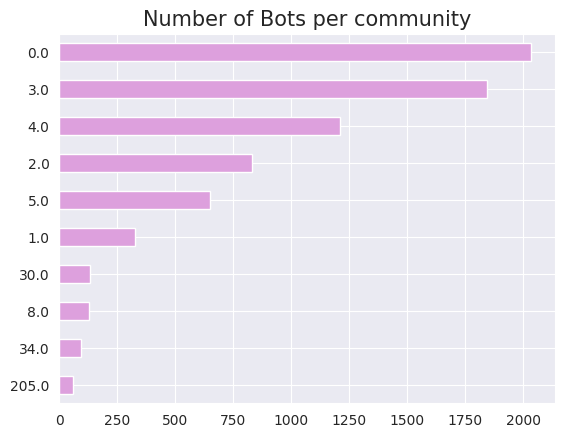

le prime 5 communities contengono il 78.21% dei Bots


In [30]:
comm = pd.Series(df_tot[df_tot["type"]=="Bot"]["community"]).value_counts()
ax = comm.iloc[:10].plot(kind='barh', color='plum') #orange #lightseagreen
ax.set_title('Number of Bots per community', fontsize=15)
ax.invert_yaxis()
plt.show()
s = 0
for i in comm[:5]:
    s = s + i
print(f"le prime 5 communities contengono il {round(s/comm.sum()*100,2)}% dei Bots")

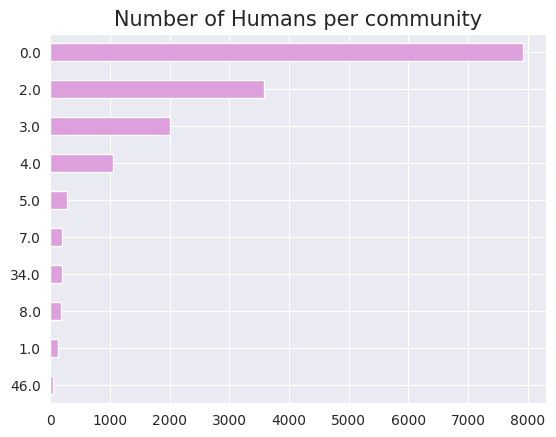

le prime 5 communities contengono il 92.29% degli Humans


In [31]:
comm = pd.Series(df_tot[df_tot["type"]=="Human"]["community"]).value_counts()
ax = comm.iloc[:10].plot(kind='barh', color='plum') #orange #lightseagreen
ax.set_title('Number of Humans per community', fontsize=15)
ax.invert_yaxis()
plt.show()
s = 0
for i in comm[:5]:
    s = s + i
print(f"le prime 5 communities contengono il {round(s/comm.sum()*100,2)}% degli Humans")

# Echo Chmabers - Astroturf

<p> accounts that engage in follow back groups and share and delete political content in high volume </p>

<p>  manually labeled political bots and accounts involved in follow trains that systematically delete content </p>

<p> Astroturfing: a technique consisting of making consensus (or dissent) around an idea, person, or activity seem spontaneous and natural, when in fact it is the result of campaigns specifically designed for that purpose. </p>

In [32]:
chambers = df_tot[df_tot["astroturf"]>0.5]
chambers

,name,score,cap,astroturf,fake_follower,financial,other,overall,self_declared,spammer,...,user_screen_name,credibility_score,SEVERE_TOXICITY,LIKELY_TO_REJECT,INSULT,PROFANITY,THREAT,type,trollscore,community
776,JeffDavies206,"{""cap"": {""english"": 0.36264564124632276, ""univ...",0.288464,0.53,0.12,0.05,0.20,0.03,0.00,0.00,...,JeffDavies206,NaN,0.044852,0.489639,0.176026,0.122222,0.369119,Human,NaN,1130.0
3956,AlbusLynx,"{""cap"": {""english"": 0.7176911080698488, ""unive...",0.260368,0.52,0.10,0.01,0.18,0.02,0.00,0.00,...,AlbusLynx,NaN,0.079488,0.283053,0.160388,0.106035,0.206283,Human,NaN,3.0
10184,MySouthernHeels,"{""cap"": {""english"": 0.4479465575931997, ""unive...",0.260368,0.58,0.03,0.00,0.16,0.02,0.00,0.00,...,MySouthernHeels,NaN,0.096825,0.266476,0.115324,0.069070,0.120821,Human,NaN,0.0
13189,Bart_Press,"{""cap"": {""english"": 0.659646495284545, ""univer...",0.260368,0.52,0.03,0.00,0.12,0.02,0.00,0.00,...,Bart_Press,NaN,0.350658,0.119299,0.336296,0.175361,0.291951,Human,NaN,NaN
15516,Mintauros1,"{""cap"": {""english"": 0.7287106185584935, ""unive...",0.260368,0.66,0.06,0.01,0.17,0.02,0.00,0.01,...,Mintauros1,NaN,0.176291,0.173636,0.158476,0.175699,0.196759,Human,0.135194,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40370,DaveSandtoft,"{""cap"": {""english"": 0.8100783815308749, ""unive...",0.825257,0.82,0.35,0.23,0.37,0.82,0.00,0.03,...,DaveSandtoft,NaN,0.062192,0.020279,0.017392,0.050971,0.031299,Bot,NaN,9.0
40419,MartinE42487571,"{""cap"": {""english"": 0.797782173166965, ""univer...",0.819348,0.80,0.25,0.03,0.47,0.80,0.01,0.01,...,MartinE42487571,NaN,0.537671,0.315767,0.200881,0.199105,0.394838,Bot,NaN,34.0
40424,mjandrade,"{""cap"": {""english"": 0.7998362042473794, ""unive...",0.813043,0.77,0.23,0.01,0.32,0.77,0.09,0.01,...,mjandrade,NaN,0.092779,0.078879,0.025644,0.038828,0.349122,Bot,NaN,4.0
40489,Macheath1,"{""cap"": {""english"": 0.8339181685112829, ""unive...",0.825257,0.82,0.50,0.07,0.51,0.82,0.02,0.00,...,Macheath1,NaN,0.067154,0.211405,0.259120,0.256097,0.146672,Bot,NaN,1.0


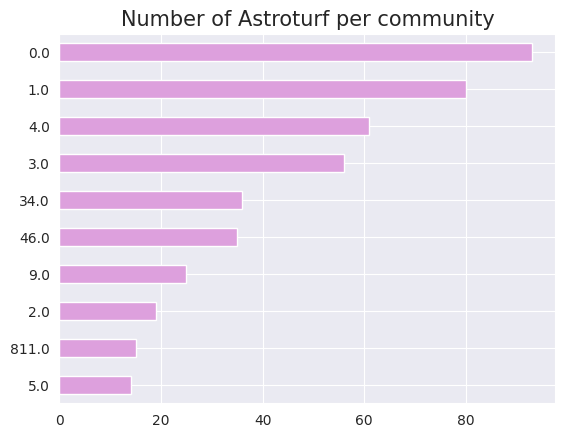

le prime 5 communities contengono il 79.49% degli Astroturf


In [33]:
comm = pd.Series(chambers["community"]).value_counts()
ax = comm.iloc[:10].plot(kind='barh', color='plum') #orange #lightseagreen
ax.set_title('Number of Astroturf per community', fontsize=15)
ax.invert_yaxis()
plt.show()
s = 0
for i in comm[:5]:
    s = s + i
print(f"le prime 5 communities contengono il {round(s/comm.sum()*100,2)}% degli Astroturf")

In [34]:
chambers_tweets = tweets[tweets["user_screen_name"].isin(list(chambers["name"]))]
chambers_tweets

,id,id_str,created_at,user_id,user_screen_name,user_verified,user_created_at,text,source,coordinates,...,quoted_user_created_at,hashtags,symbols,user_mentions,urls,polls,media,user_tweets_count,user_friends_count,user_followers_count
5,1221732930738905088,1221732930738905088,Mon Jan 27 09:53:24 +0000 2020,3194573930,pvsassone,False,Wed May 13 17:31:39 +0000 2015,Ma prima una premessa per chi non conosce la v...,"<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,[],[],"[{'screen_name': 'FabbioSabatini', 'name': 'Fa...",[],[],[],NaN,NaN,NaN
20,1221733981714034689,1221733981714034689,Mon Jan 27 09:57:34 +0000 2020,884023737745645572,Carmela_oltre,False,Sun Jul 09 12:17:38 +0000 2017,《Era questa la loro vittoria\nil loro obiettiv...,"<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,[],[],"[{'screen_name': 'MollyBloom82', 'name': 'Moll...",[],[],[],NaN,NaN,NaN
41,1221729081152155648,1221729081152155648,Mon Jan 27 09:38:06 +0000 2020,2969405391,scheerenberger,False,Fri Jan 09 09:29:50 +0000 2015,“Coltivare la Memoria è ancora oggi un vaccino...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,[],[],"[{'screen_name': 'Irene_Silmarien', 'name': '𝙎...",[],[],[],NaN,NaN,NaN
302,1221696006175305728,1221696006175305728,Mon Jan 27 07:26:40 +0000 2020,1254832039,Etya73,False,Sat Mar 09 16:45:16 +0000 2013,"""Coltivare la #Memoria è ancora oggi un vaccin...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,"[{'text': 'Memoria', 'indices': [33, 41]}, {'t...",[],"[{'screen_name': 'mariamedici10', 'name': 'Mar...",[],[],[],NaN,NaN,NaN
950,1222194261623558144,1222194261623558144,Tue Jan 28 16:26:33 +0000 2020,884023737745645572,Carmela_oltre,False,Sun Jul 09 12:17:38 +0000 2017,In Repubblica Democratica del #Congo è in cors...,"<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,"[{'text': 'Congo', 'indices': [43, 49]}, {'tex...",[],"[{'screen_name': 'alswolf', 'name': 'Alessandr...",[],[],[],NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4050316,1394574552945025027,1394574552945025027,Tue May 18 08:44:18 +0000 2021,1341462944,paoloigna1,False,Wed Apr 10 09:29:25 +0000 2013,Per la valutazione della Campagna vaccinale eu...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,"[{'text': 'Turismo', 'indices': [108, 116]}]",[],[],"[{'url': 'https://t.co/XrsObD38No', 'expanded_...",[],[],1895314.0,92633.0,91808.0
4052161,1394599229813936128,1394599229813936128,Tue May 18 10:22:21 +0000 2021,1162664172511014912,Ettore572,False,Sat Aug 17 09:55:41 +0000 2019,Pur di andare in vacanza sono disposti a tutto...,"<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,[],[],"[{'screen_name': 'antonellafini4', 'name': 'an...",[],[],[],162745.0,4701.0,3780.0
4052355,1394602225893322752,1394602225893322752,Tue May 18 10:34:15 +0000 2021,2283375104,Nonnadinano,False,Thu Jan 09 10:13:45 +0000 2014,Perché nel momento in cui la sua campagna di v...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,[],[],"[{'screen_name': 'ilfoglio_it', 'name': 'Il Fo...",[],[],[],113008.0,6139.0,5711.0
4052643,1394605206470541315,1394605206470541315,Tue May 18 10:46:06 +0000 2021,1076779266619121665,Claudoc3,False,Sun Dec 23 09:59:17 +0000 2018,"Ma avete fatto caso che, politici e giornalist...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,[],[],"[{'screen_name': 'noitre32', 'name': 'noitre32...",[],[],[],74621.0,4189.0,4202.0


In [35]:
chambers_retweets = tweets[tweets["rt_user_screen_name"].isin(list(chambers["name"]))]
chambers_retweets

,id,id_str,created_at,user_id,user_screen_name,user_verified,user_created_at,text,source,coordinates,...,quoted_user_created_at,hashtags,symbols,user_mentions,urls,polls,media,user_tweets_count,user_friends_count,user_followers_count
15284,1219655156498862080,1219655156498862080,Tue Jan 21 16:17:04 +0000 2020,2255392334,lacuocagalante,False,Fri Dec 20 18:55:50 +0000 2013,#PerchéSì: la comunicazione sui vaccini divent...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,"[{'text': 'PerchéSì', 'indices': [21, 30]}, {'...",[],"[{'screen_name': 'GiovannaDiTroia', 'name': 'G...","[{'url': 'https://t.co/AxN2apn98h', 'expanded_...",[],[],NaN,NaN,NaN
19739,1311758387856760832,1311758387856760832,Thu Oct 01 20:02:25 +0000 2020,1244671070600298498,R9Mancini,False,Mon Mar 30 17:03:33 +0000 2020,https://t.co/RHC1k4pKIF,"<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,[],[],"[{'screen_name': 'paoloigna1', 'name': 'paolo ...","[{'url': 'https://t.co/RHC1k4pKIF', 'expanded_...",[],[],NaN,NaN,NaN
27922,1314917069826260992,1314917069826260992,Sat Oct 10 13:13:54 +0000 2020,719098026434945025,VivMilano,False,Sun Apr 10 09:41:44 +0000 2016,@Agenzia_Italia 🙏\nDefinizione \ndi :\nVaccino...,"<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,[],[],"[{'screen_name': 'VivMilano', 'name': 'Viv Mil...",[],[],"[{'id': 1306622950884413441, 'id_str': '130662...",NaN,NaN,NaN
29098,1314796229805649921,1314796229805649921,Sat Oct 10 05:13:43 +0000 2020,575059060,FaustoBianchini,False,Wed May 09 04:51:19 +0000 2012,Ma come è possibile quello che fa #Fontana fin...,"<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,"[{'text': 'Fontana', 'indices': [51, 59]}]",[],"[{'screen_name': 'CPapasergio', 'name': 'Claud...",[],[],[],NaN,NaN,NaN
33482,1315233404007272448,1315233404007272448,Sun Oct 11 10:10:54 +0000 2020,857323772906483712,Angelit92832011,False,Wed Apr 26 20:01:30 +0000 2017,Come mai in tutti i quotidiani lombardi non si...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,"[{'text': 'FontanaGallera', 'indices': [90, 10...",[],"[{'screen_name': 'CPapasergio', 'name': 'Claud...",[],[],[],NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4003875,1393869471618670592,1393869471618670592,Sun May 16 10:02:33 +0000 2021,390032884,GAngrilli,False,Thu Oct 13 10:59:44 +0000 2011,"Un' amica una settimana fa, ha fatto il vaccin...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,[],[],"[{'screen_name': 'ierogamos', 'name': 'patrizi...",[],[],[],93325.0,2997.0,5131.0
4010117,1393941244452163587,1393941244452163587,Sun May 16 14:47:45 +0000 2021,1285295149082447872,Pixty3,False,Mon Jul 20 19:27:47 +0000 2020,"Un' amica una settimana fa, ha fatto il vaccin...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,[],[],"[{'screen_name': 'ierogamos', 'name': 'patrizi...",[],[],[],47665.0,114.0,322.0
4021899,1394165713196228611,1394165713196228611,Mon May 17 05:39:43 +0000 2021,1336788412930658305,antonellafini4,False,Wed Dec 09 21:43:17 +0000 2020,"""Berlusconi sarebbe all'ospedale San Raffaele ...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,[],[],"[{'screen_name': 'ierogamos', 'name': 'patrizi...",[],[],[],613.0,144.0,60.0
4029315,1394245618890051587,1394245618890051587,Mon May 17 10:57:14 +0000 2021,1333092891238002689,Address0x,False,Sun Nov 29 16:58:31 +0000 2020,Si cerca di accelerare al massimo una delle va...,"<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,[],[],"[{'screen_name': 'paoloigna1', 'name': 'paolo ...","[{'url': 'https://t.co/KP7tG6CsKG', 'expanded_...",[],[],7037.0,3844.0,1461.0


In [36]:
chambers_tweets["user_screen_name"].value_counts()

paoloigna1         2894
Carmela_oltre      2138
pvsassone          1757
Ettore572          1630
aldoceccarelli      497
                   ... 
_INPST                1
JackieD23444532       1
Xiaoyangluo           1
combatsespoir         1
TimaoPetralha         1
Name: user_screen_name, Length: 574, dtype: int64

In [37]:
chambers_tweets["rt_user_screen_name"].value_counts()

Cartabellotta      458
Tg3web             416
ultimenotizie      378
RobertoBurioni     256
agorarai           255
                  ... 
graziano_delrio      1
RTaverBella          1
NicolaMelloni        1
mbx1900              1
antonellafini4       1
Name: rt_user_screen_name, Length: 2684, dtype: int64

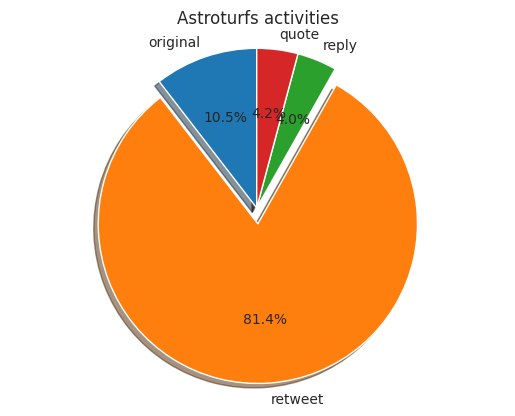

In [38]:
split = utils.split(chambers_tweets)
lst_label = ['original', 'retweet', 'reply', 'quote']
lst_values = [split[i] for i in lst_label]
fig1, ax1 = plt.subplots()
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
ax1.pie(lst_values, labels=lst_label, explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Astroturfs activities")
plt.show()

In [39]:
print(len(set(chambers_tweets["user_screen_name"])))
cont = 0
for i in chambers.user_screen_name:
    if i in list(df_bots["name"]):
        cont += 1
print(cont)

574
528
